**1.Import all the libraries**

In [2]:
# Data Manipulation and Numerical Computation
import pandas as pd                       # For data manipulation and data frame operations
import numpy as np                        # For numerical computations and array operations

# Data Visualization
import matplotlib.pyplot as plt           # For basic plotting and visualization
import seaborn as sns                     # For statistical data visualization
import plotly.express as px               # For interactive visualizations
import altair as alt                      # For declarative visualizations

# Statistical Analysis
import scipy.stats as stats               # General-purpose statistical tools and hypothesis tests
import statsmodels.api as sm              # Comprehensive statistical modeling and testing
from scipy.stats import norm              # Specialized normal distribution calculations

# Machine Learning - Preprocessing
from sklearn.model_selection import train_test_split       # For splitting data into train and test sets
from sklearn.preprocessing import StandardScaler, RobustScaler  # For scaling data
from sklearn.impute import SimpleImputer                   # For handling missing values
from sklearn.pipeline import Pipeline                      # For organizing preprocessing and modeling

# Machine Learning - Models
from sklearn.linear_model import LinearRegression, LogisticRegression  # For regression and classification models
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier  # For ensemble-based models
from sklearn.svm import SVR, SVC                          # For Support Vector Machines
from xgboost import XGBRegressor, XGBClassifier           # For gradient boosting models

# Machine Learning - Metrics and Evaluation
from sklearn.metrics import mean_squared_error, r2_score  # For regression evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score  # For classification evaluation

# System and Debugging
import warnings                                            # For suppressing warnings
warnings.filterwarnings("ignore")                         # Ignore warnings for cleaner output


**2.Upload the data set under the variable "predictcare"**

In [4]:
cardio = pd.read_csv("C:\\Users\\Dell\\OneDrive\\Desktop\\Cardiovascular_dataset.csv")

**3. Display the dataset**

In [6]:
print(cardio)

          id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393       2     168    62.0    110     80            1     1   
1          1  20228       1     156    85.0    140     90            3     1   
2          2  18857       1     165    64.0    130     70            3     1   
3          3  17623       2     169    82.0    150    100            1     1   
4          4  17474       1     156    56.0    100     60            1     1   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993  19240       2     168    76.0    120     80            1     1   
69996  99995  22601       1     158   126.0    140     90            2     2   
69997  99996  19066       2     183   105.0    180     90            3     1   
69998  99998  22431       1     163    72.0    135     80            1     2   
69999  99999  20540       1     170    72.0    120     80            2     1   

       smoke  alco  active  cardio  
0 

In [7]:
cardio.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0

In [8]:
cardio.tail()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
69995  99993  19240       2     168    76.0    120     80            1     1   
69996  99995  22601       1     158   126.0    140     90            2     2   
69997  99996  19066       2     183   105.0    180     90            3     1   
69998  99998  22431       1     163    72.0    135     80            1     2   
69999  99999  20540       1     170    72.0    120     80            2     1   

       smoke  alco  active  cardio  
69995      1     0       1       0  
69996      0     0       1       1  
69997      0     1       0       1  
69998      0     0       0       1  
69999      0     0       1       0

**4.Data Cleaning**

In [10]:
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [11]:
cardio.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [12]:
# Count unique values in each column
unique_values = cardio.nunique()

# Display unique values
print(unique_values)


id             70000
age             8076
gender             2
height           109
weight           287
ap_hi            153
ap_lo            157
cholesterol        3
gluc               3
smoke              2
alco               2
active             2
cardio             2
dtype: int64


In [13]:
# To check the number of duplicate values
Dup = cardio.duplicated().sum()
if Dup >0:
    print("There is",Dup,"Duplicate value")
else:
    print("No Duplicate value")

No Duplicate value


In [14]:
for column in cardio.select_dtypes(include="object").columns:
    print(f"{cardio[column].value_counts()}\n")


In [15]:
# Check for NaN values in the dataset
nan_values = cardio.isna().sum()
print(nan_values)

# Percentage of NaN values in each column
nan_percentage = (cardio.isna().sum() / len(cardio)) * 100
print(nan_percentage)


id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64
id             0.0
age            0.0
gender         0.0
height         0.0
weight         0.0
ap_hi          0.0
ap_lo          0.0
cholesterol    0.0
gluc           0.0
smoke          0.0
alco           0.0
active         0.0
cardio         0.0
dtype: float64


In [16]:
cardio.describe().round(2).style.background_gradient()

In [17]:
# To create the copy of dataset for further cleaning and updation
Ccardio = cardio.copy()

In [18]:
# Check unique values and their frequency for each column
for column in Ccardio.columns:
    print(f"Column: {column}")
    print(Ccardio[column].value_counts())
    print("\n")



Column: id
id
0        1
66623    1
66631    1
66630    1
66628    1
        ..
33338    1
33339    1
33340    1
33341    1
99999    1
Name: count, Length: 70000, dtype: int64


Column: age
age
19741    32
18236    32
20376    31
18253    31
20442    31
         ..
19277     1
16493     1
20059     1
23659     1
17926     1
Name: count, Length: 8076, dtype: int64


Column: gender
gender
1    45530
2    24470
Name: count, dtype: int64


Column: height
height
165    5853
160    5022
170    4679
168    4399
164    3396
       ... 
112       1
98        1
74        1
119       1
57        1
Name: count, Length: 109, dtype: int64


Column: weight
weight
65.0    3850
70.0    3764
68.0    2831
75.0    2740
60.0    2710
        ... 
92.2       1
75.6       1
82.9       1
23.0       1
99.9       1
Name: count, Length: 287, dtype: int64


Column: ap_hi
ap_hi
 120     27699
 140      9506
 130      8961
 110      8644
 150      4450
         ...  
 1620        1
 199         1
-150         1
-115

In [19]:
# Remove rows with unrealistic height or blood pressure values
Ccardio = Ccardio[(Ccardio['height'] > 50) & (Ccardio['height'] < 250)]
Ccardio = Ccardio[(Ccardio['ap_hi'] > 50) & (Ccardio['ap_hi'] < 250)]
Ccardio = Ccardio[(Ccardio['ap_lo'] > 50) & (Ccardio['ap_lo'] < 250)]


In [20]:
# Assuming 'gender' is 1 (female) and 2 (male), if there's any other value, it's an error
Ccardio = Ccardio[Ccardio['gender'].isin([1, 2])]


In [21]:
# Ensure only valid values for cholesterol and gluc (1, 2, 3)
Ccardio = Ccardio[Ccardio['cholesterol'].isin([1, 2, 3])]
Ccardio = Ccardio[Ccardio['gluc'].isin([1, 2, 3])]


In [22]:
# Ensure 'cardio' values are only 0 or 1 (binary)
Ccardio = Ccardio[Ccardio['cardio'].isin([0, 1])]


**outliers**

In [24]:
# List of numerical columns
numerical_columns = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']


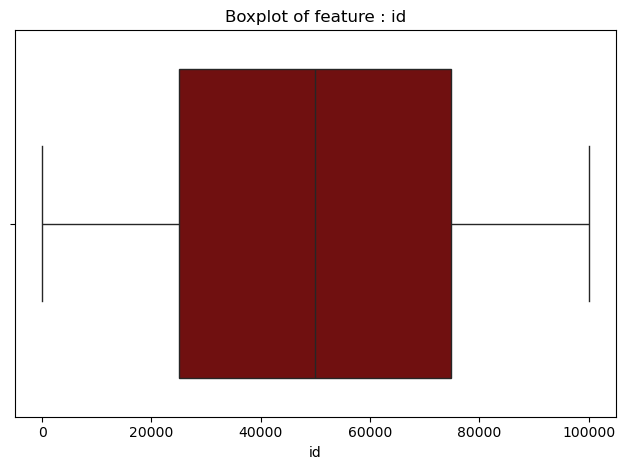

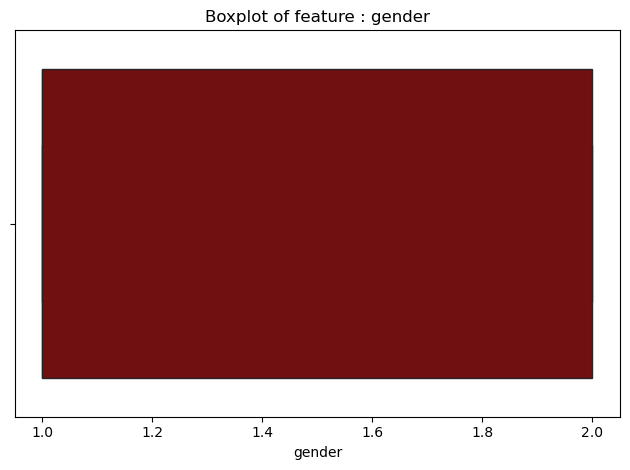

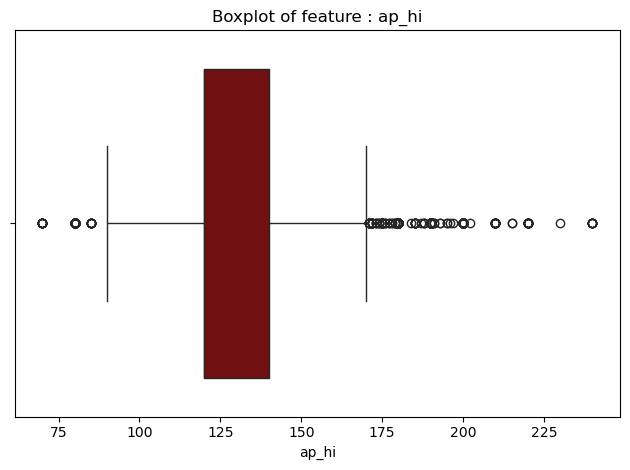

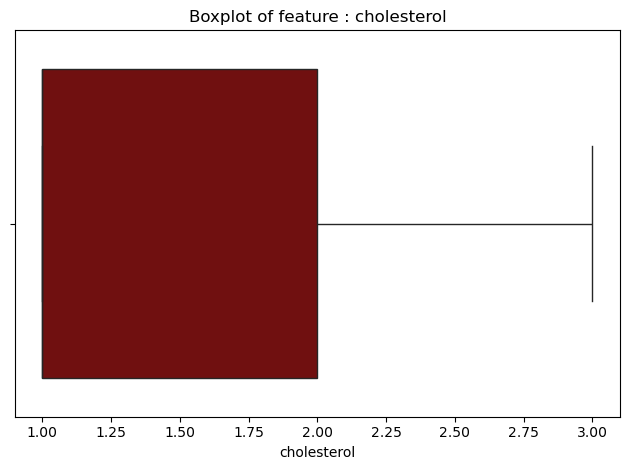

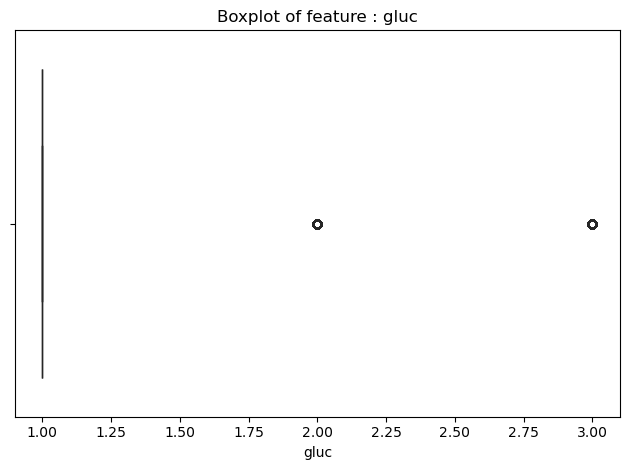

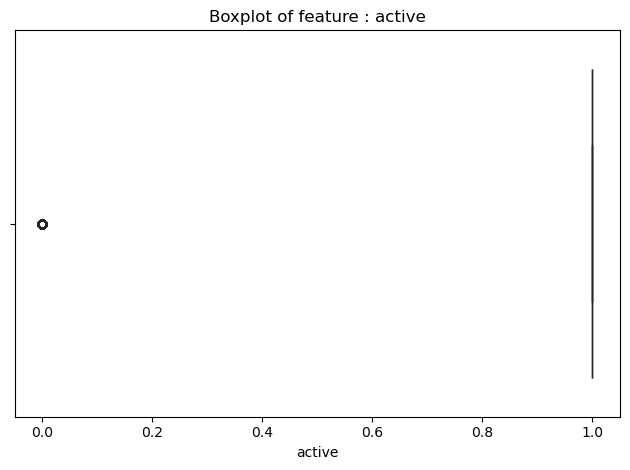

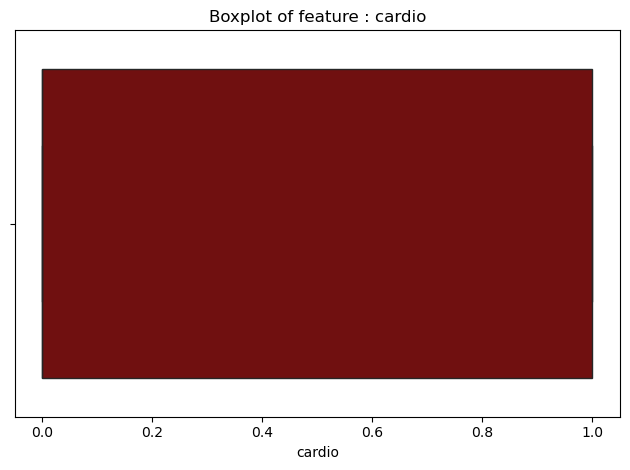

In [25]:
# Outlier detection using boxplot
for column in Ccardio.select_dtypes(include="number").columns:
    if column == "index":
        continue
    sns.boxplot(data=Ccardio, x=column,color='maroon')
    plt.title(f"Boxplot of feature : {column}")
    plt.tight_layout()
    plt.show()
    print("\n")

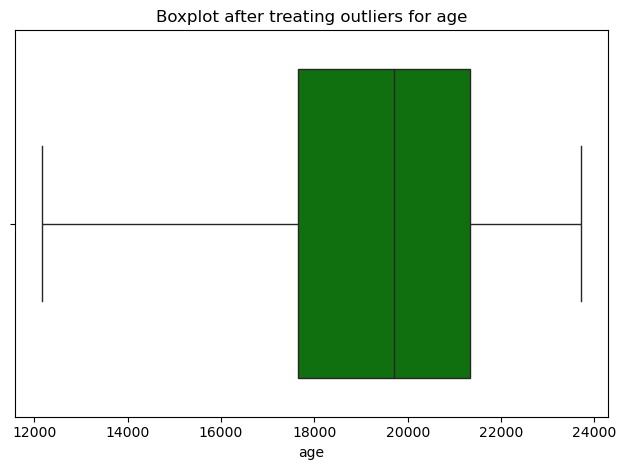

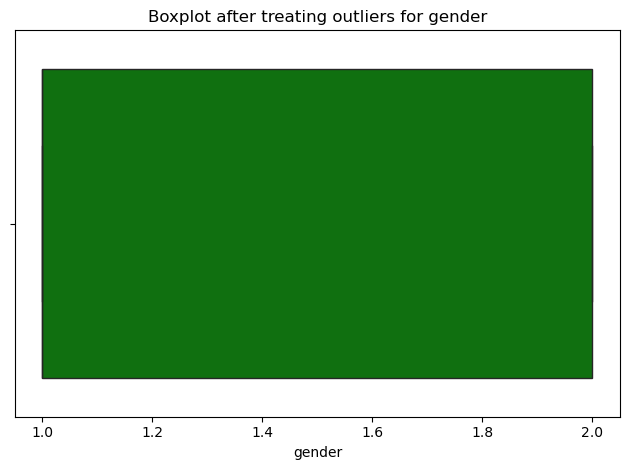

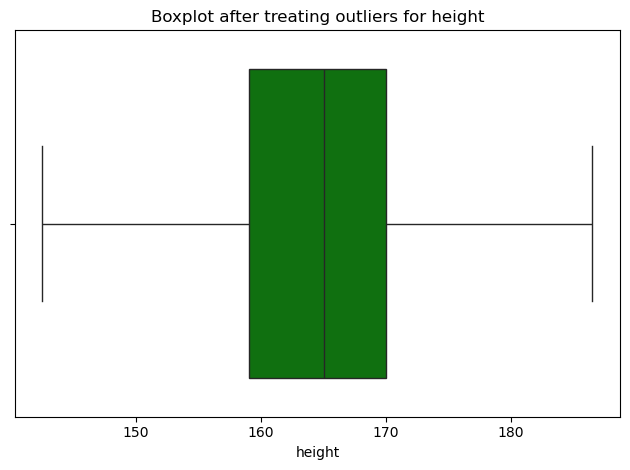

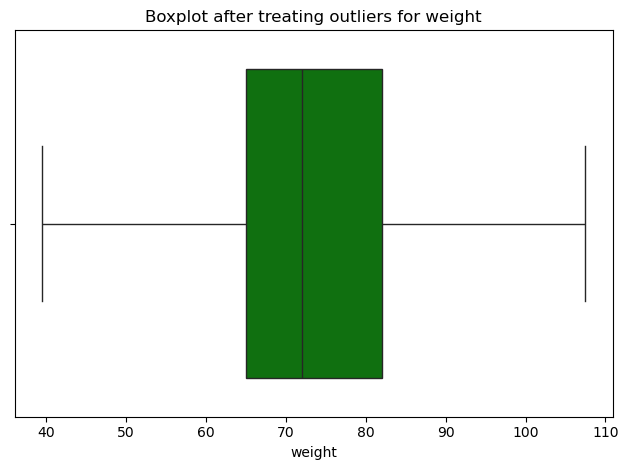

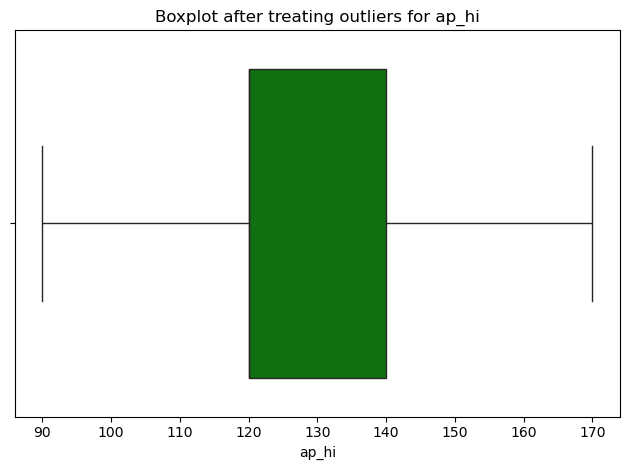

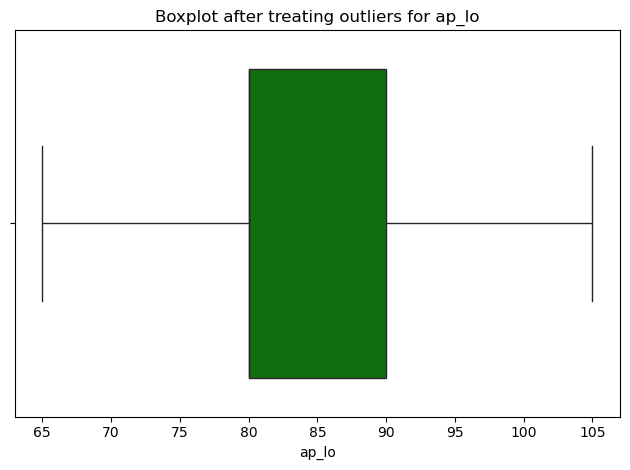

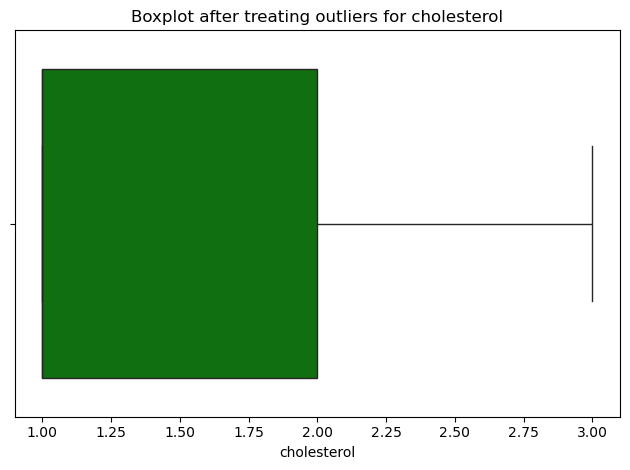

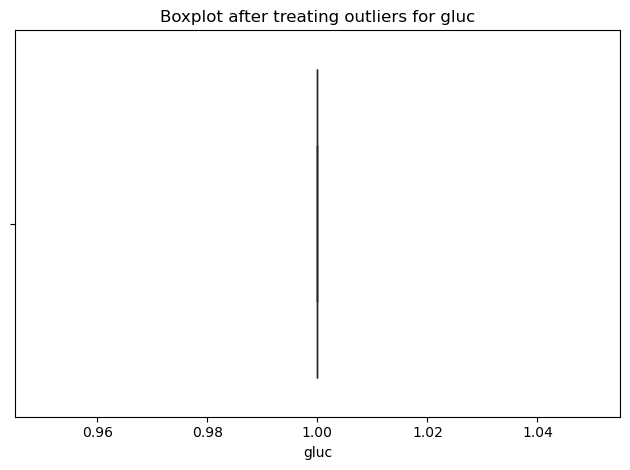

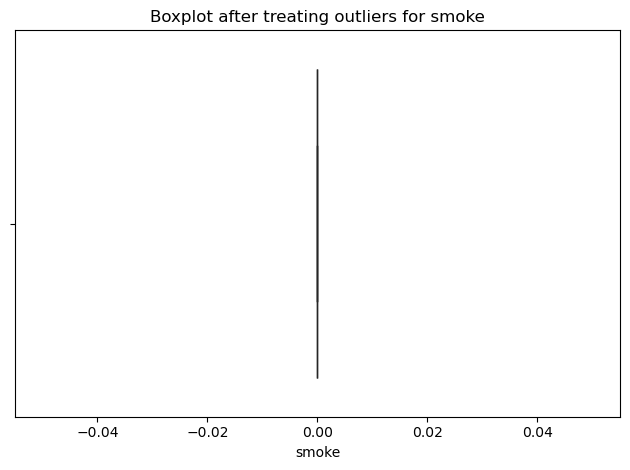

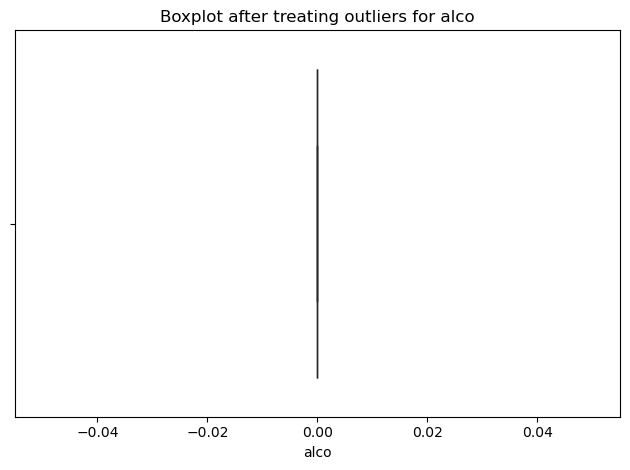

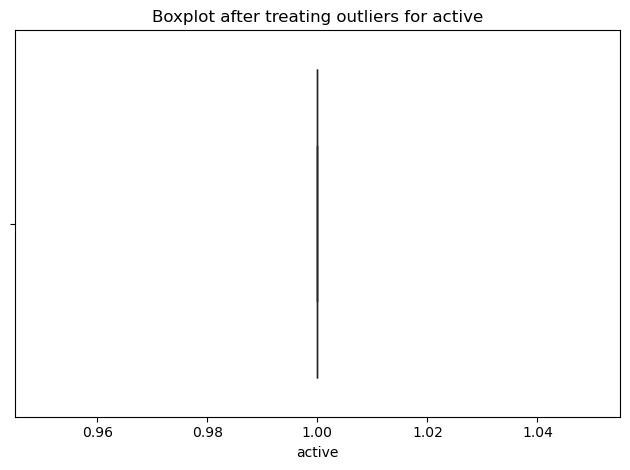

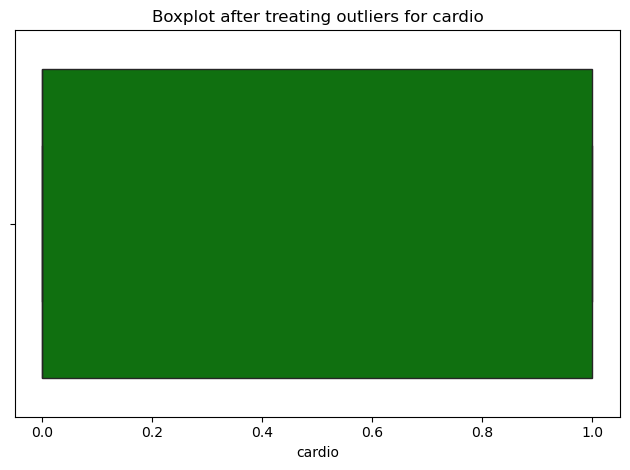

In [26]:
# Define a function to treat outliers using IQR
def treat_outliers_iqr(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)  # Cap the outliers
    return df

# Apply the function
numerical_columns = Ccardio.select_dtypes(include=["number"]).columns
Ccardio = treat_outliers_iqr(Ccardio, numerical_columns)

# Visualize the treated data with boxplots
for column in numerical_columns:
    sns.boxplot(x=Ccardio[column], color='green')
    plt.title(f"Boxplot after treating outliers for {column}")
    plt.tight_layout()
    plt.show()


**skewness**

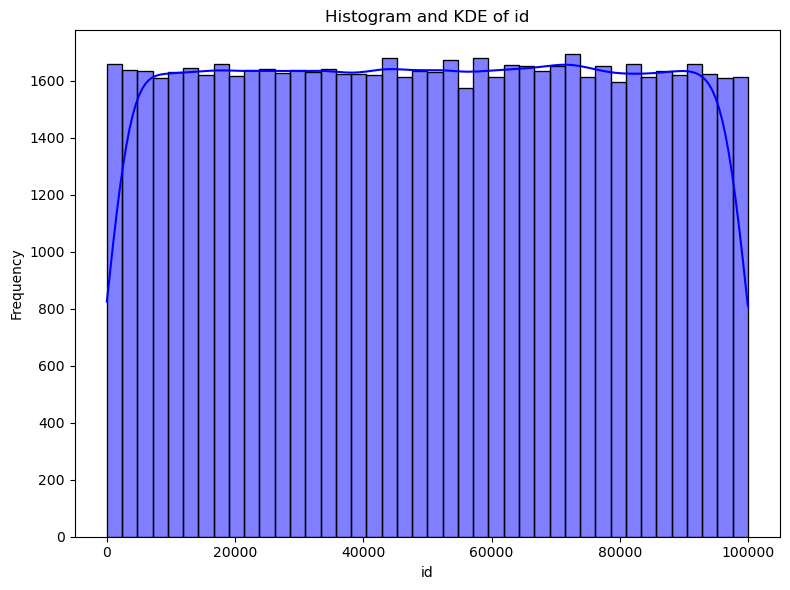

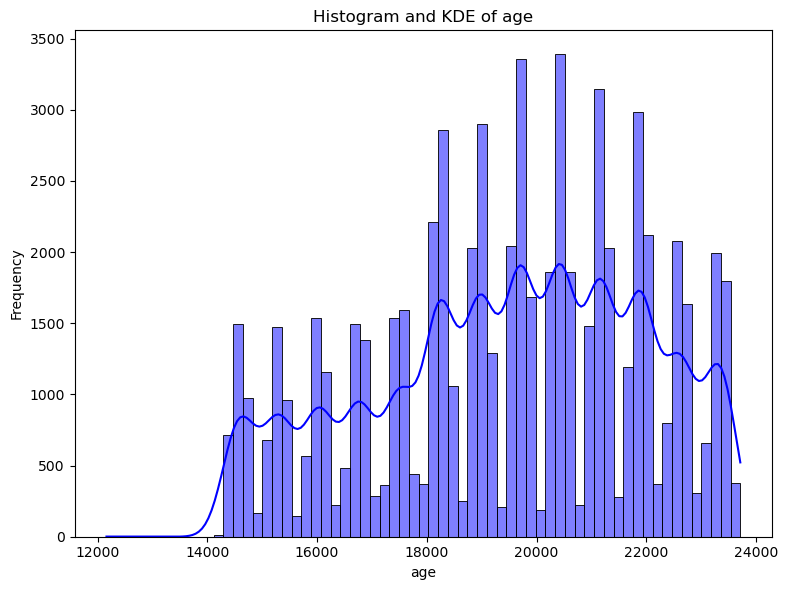

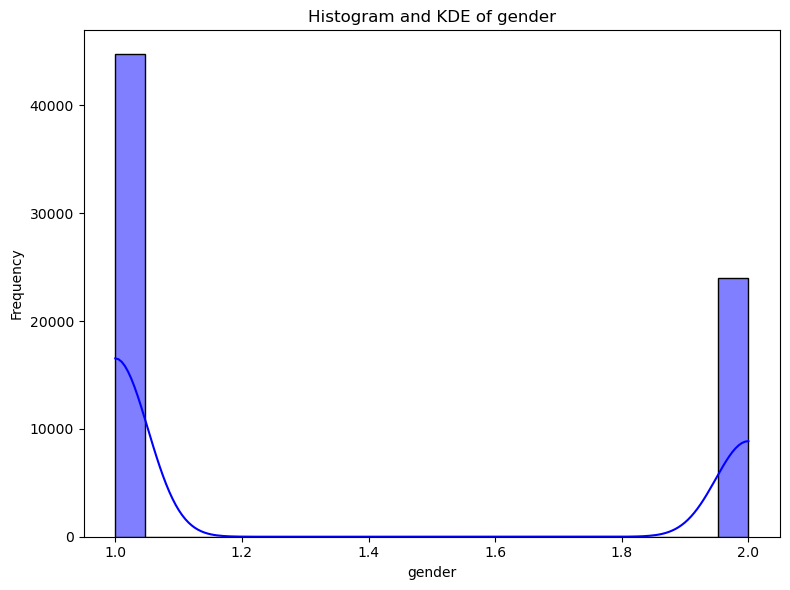

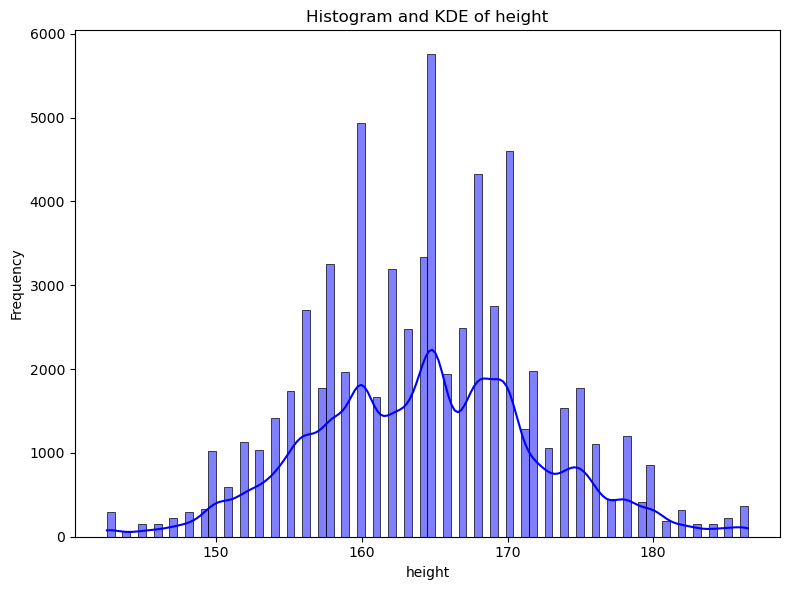

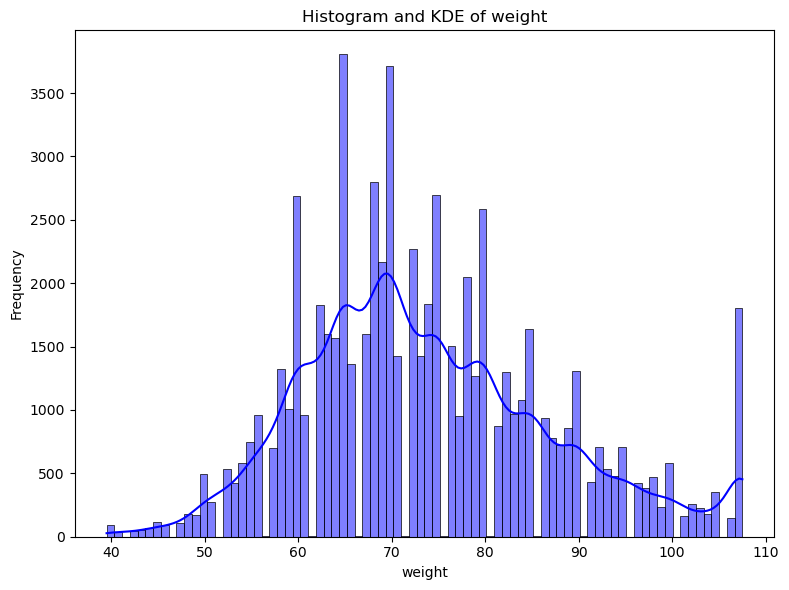

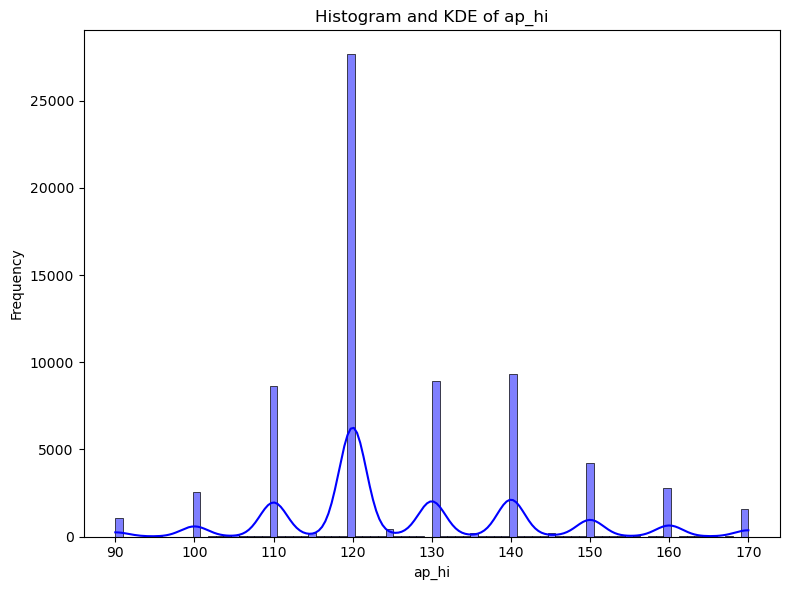

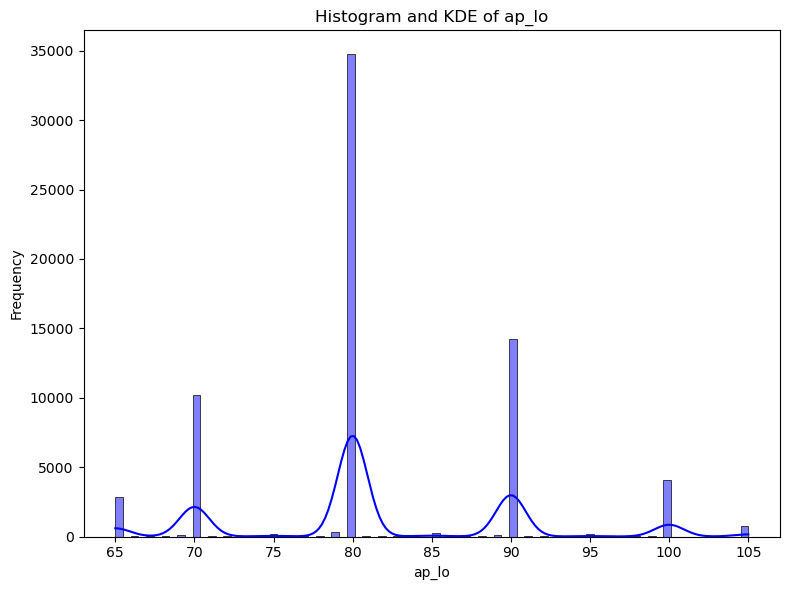

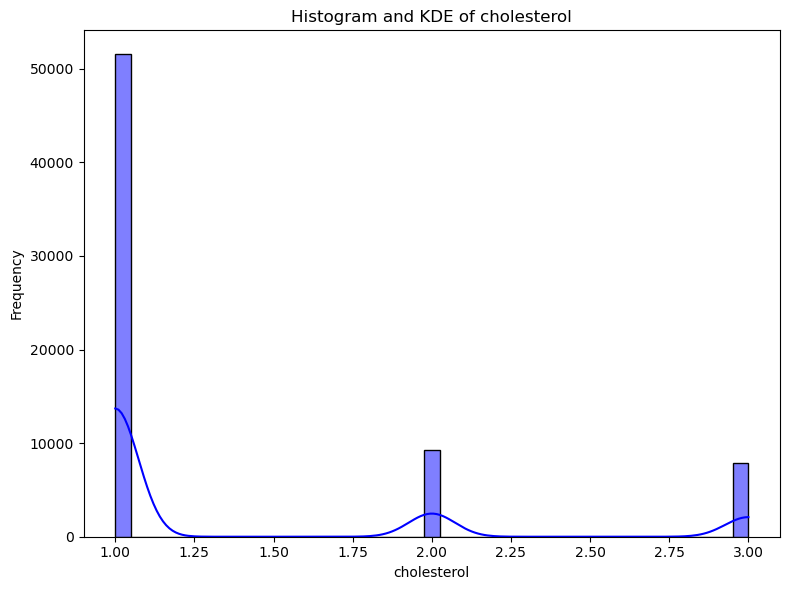

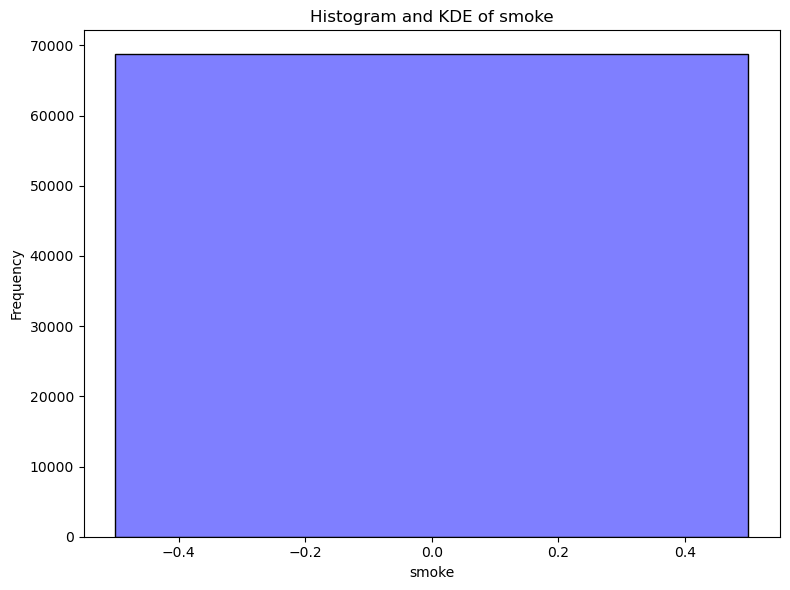

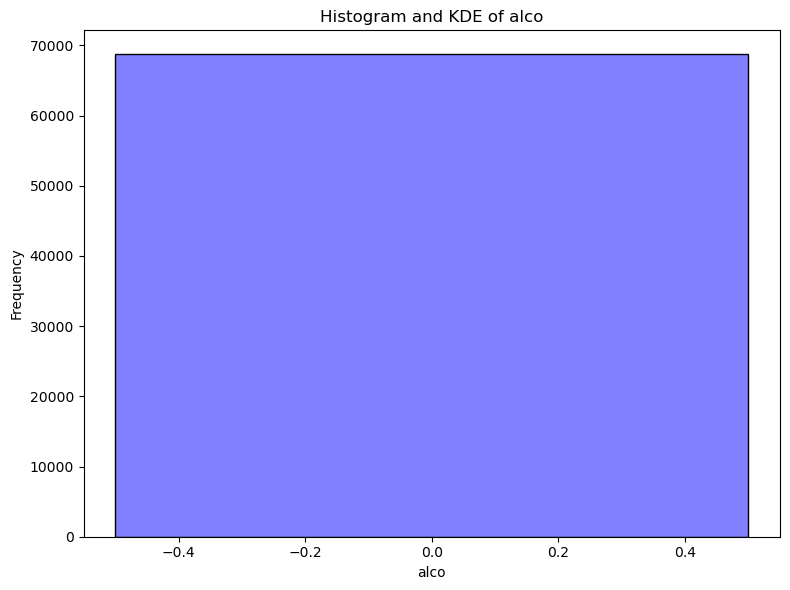

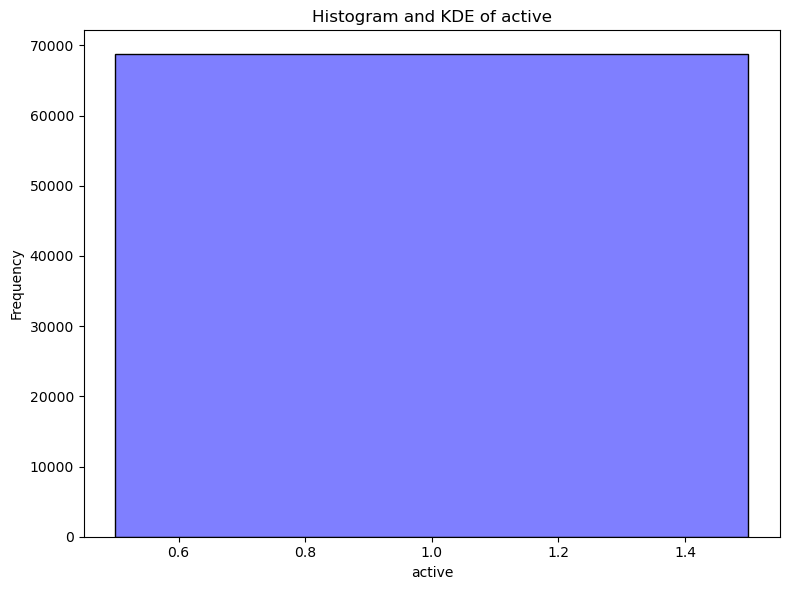

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for numerical columns
for column in Ccardio.select_dtypes(include='number').columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(Ccardio[column], kde=True, color='blue')
    plt.title(f"Histogram and KDE of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


In [29]:
# Check skewness for numerical columns
skewness = Ccardio.select_dtypes(include='number').skew()
print(skewness)


id            -0.001460
age           -0.305360
gender         0.634041
height         0.085229
weight         0.514330
ap_hi          0.632426
ap_lo          0.369878
cholesterol    1.596690
gluc           0.000000
smoke          0.000000
alco           0.000000
active         0.000000
cardio         0.019740
dtype: float64


In [30]:
import numpy as np

# Apply log transformation to columns with high skewness (example: cholesterol, ap_hi, ap_lo, weight)
Ccardio['cholesterol'] = np.log1p(Ccardio['cholesterol'])
Ccardio['weight'] = np.log1p(Ccardio['weight'])
Ccardio['ap_hi'] = np.log1p(Ccardio['ap_hi'])
Ccardio['ap_lo'] = np.log1p(Ccardio['ap_lo'])


In [31]:
# Check skewness after transformation
print(Ccardio.skew())


id            -0.001460
age           -0.305360
gender         0.634041
height         0.085229
weight         0.043604
ap_hi          0.248337
ap_lo          0.070941
cholesterol    1.446585
gluc           0.000000
smoke          0.000000
alco           0.000000
active         0.000000
cardio         0.019740
dtype: float64


In [32]:
# Loop through the numerical columns and apply log transformation for significant skewness
for column in Ccardio.select_dtypes(include="number").columns:
    if column == "index":  # Skip the index column if present
        continue

    # Calculate skewness of the column
    skewness = Ccardio[column].skew()

    # Check if skewness is significant (e.g., greater than 0.5)
    if skewness > 0.5:  # adjust the threshold based on your context
        print(f"Applying log transformation to {column} due to skewness of {skewness:.3f}")
        
        # Apply log transformation (handle zeros and negative values)
        Ccardio[column] = np.log1p(Ccardio[column])  # log1p is log(x + 1), safe for zero values

    else:
        print(f"No transformation needed for {column} (skewness: {skewness:.3f})")
print(Ccardio.head())   

No transformation needed for id (skewness: -0.001)
No transformation needed for age (skewness: -0.305)
Applying log transformation to gender due to skewness of 0.634
No transformation needed for height (skewness: 0.085)
No transformation needed for weight (skewness: 0.044)
No transformation needed for ap_hi (skewness: 0.248)
No transformation needed for ap_lo (skewness: 0.071)
Applying log transformation to cholesterol due to skewness of 1.447
No transformation needed for gluc (skewness: 0.000)
No transformation needed for smoke (skewness: 0.000)
No transformation needed for alco (skewness: 0.000)
No transformation needed for active (skewness: 0.000)
No transformation needed for cardio (skewness: 0.020)
   id      age    gender  height    weight     ap_hi     ap_lo  cholesterol  \
0   0  18393.0  1.098612   168.0  4.143135  4.709530  4.394449     0.526589   
1   1  20228.0  0.693147   156.0  4.454347  4.948760  4.510860     0.869742   
2   2  18857.0  0.693147   165.0  4.174387  4.8751

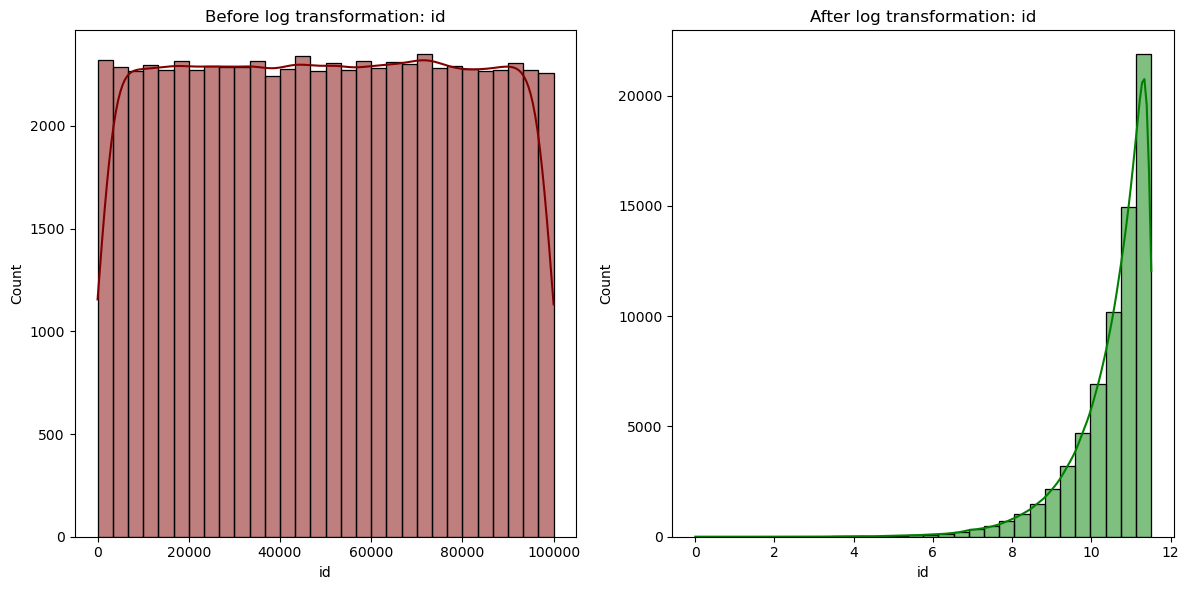

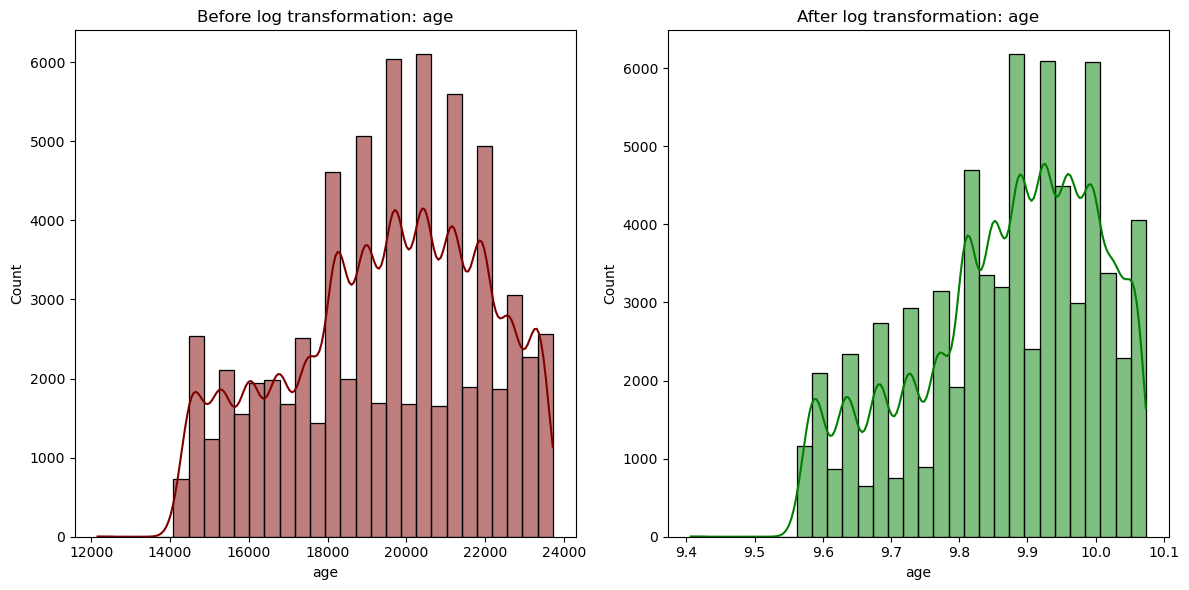

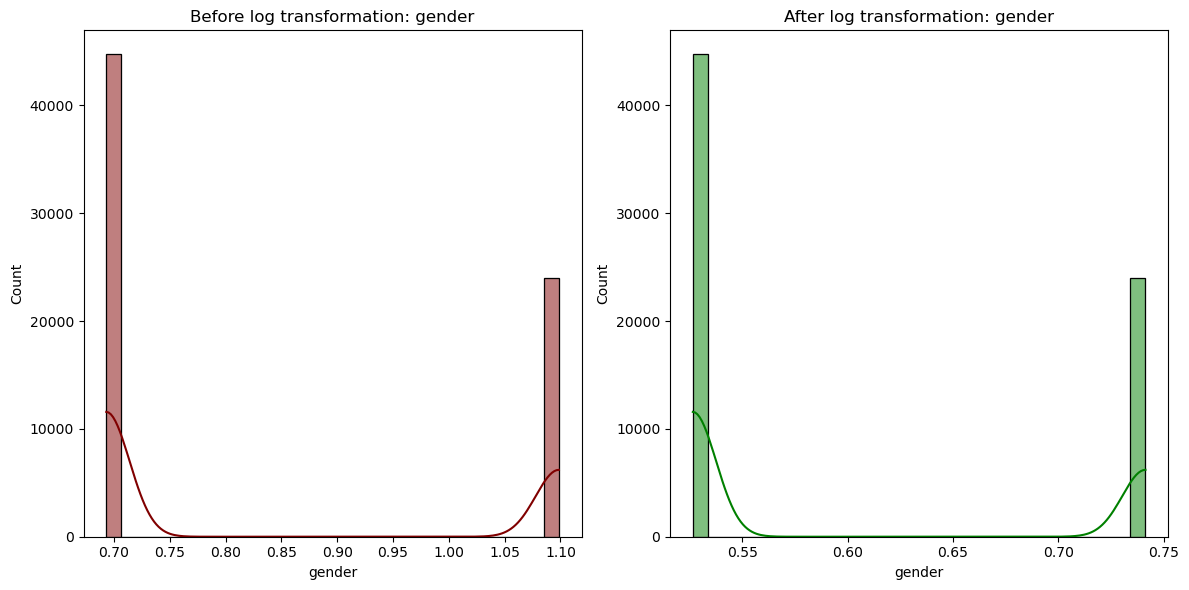

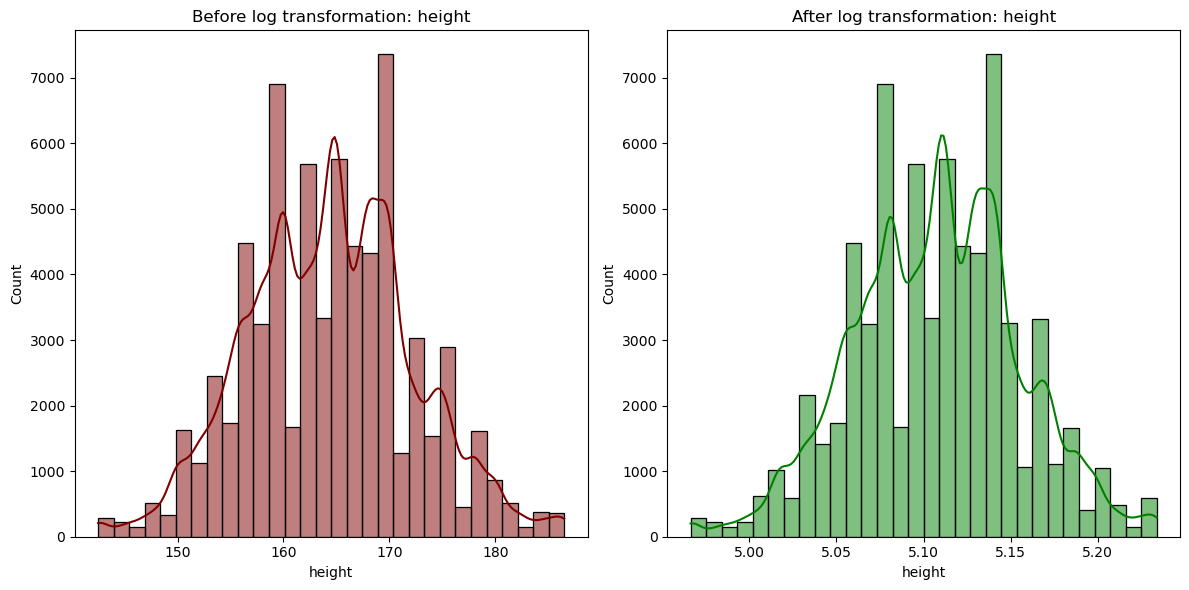

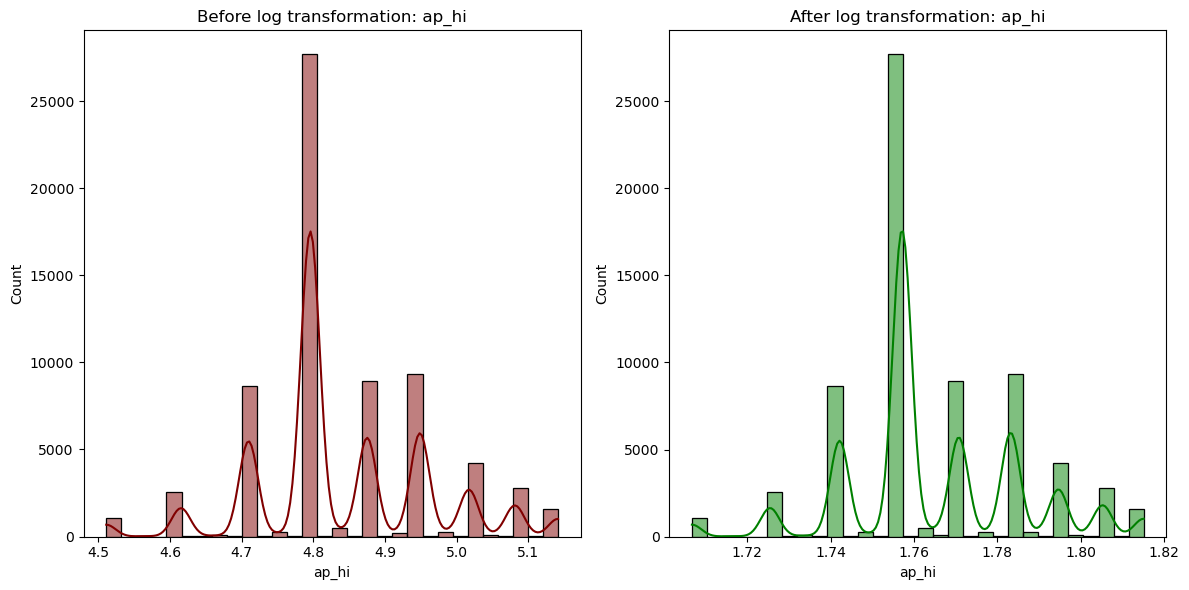

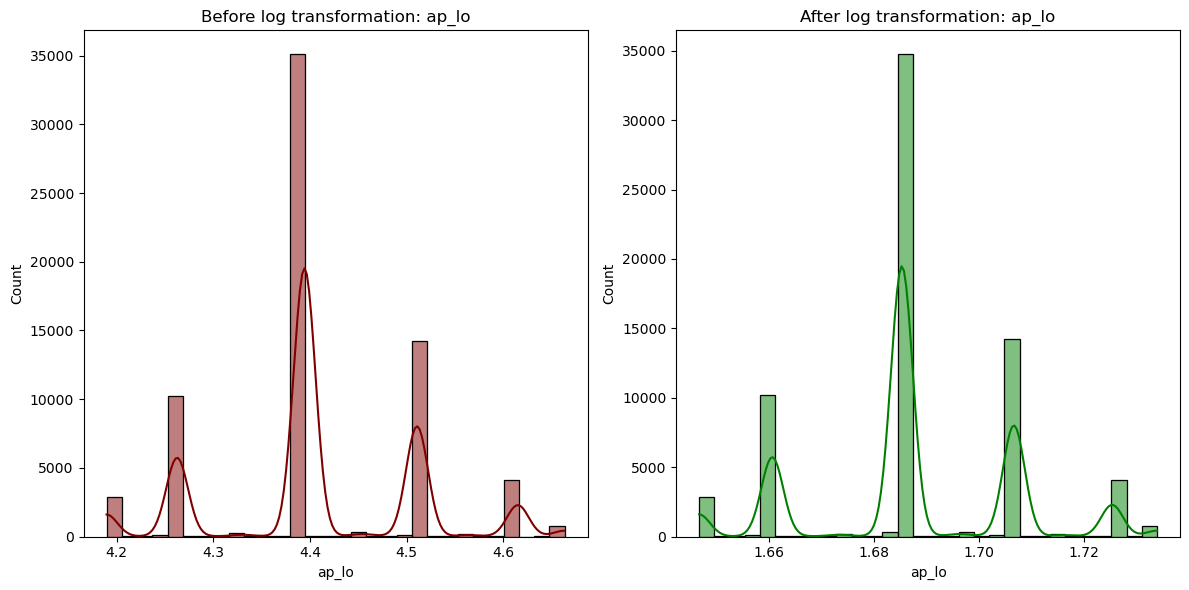

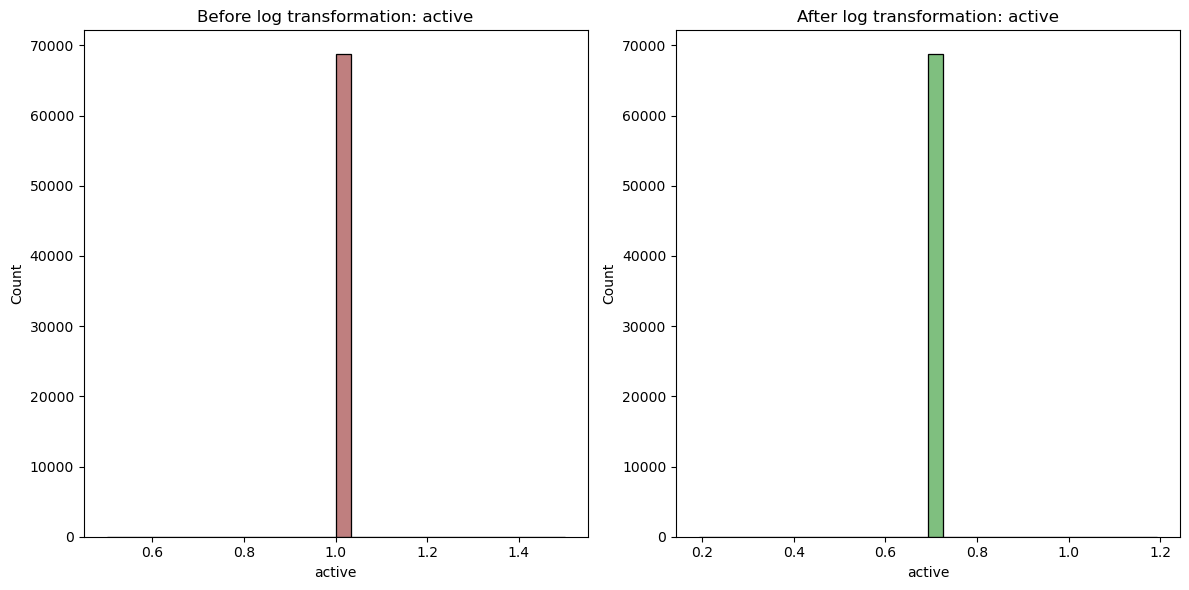

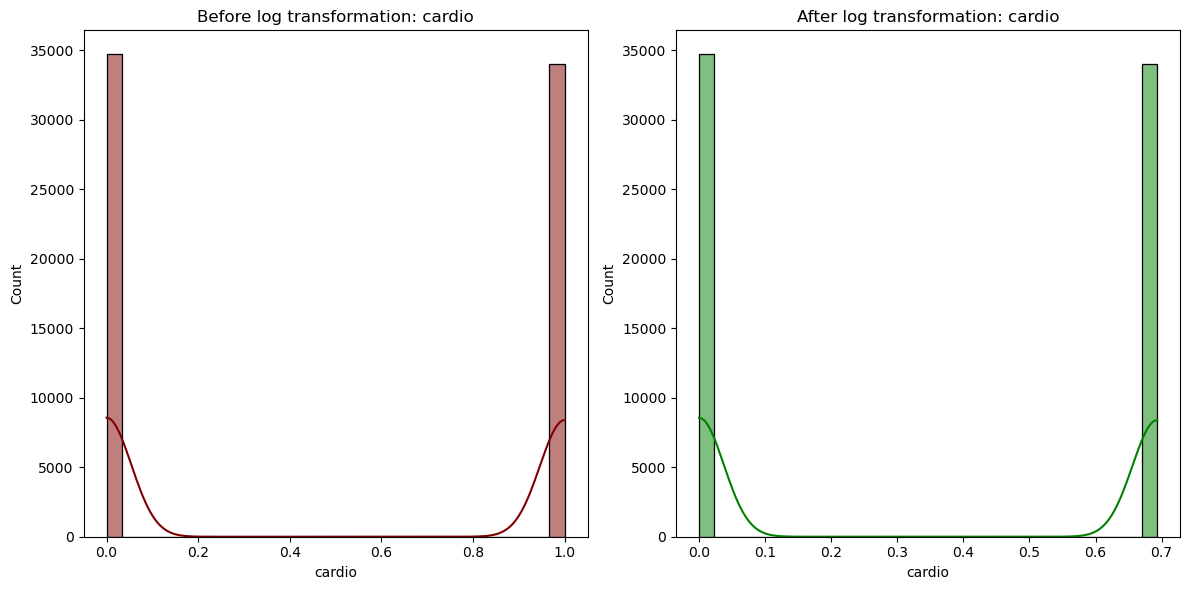

In [33]:
for column in Ccardio.select_dtypes(include="number").columns:
    if column == "index":  # Skip the index column if present
        continue
    plt.figure(figsize=(12, 6))

    # Before transformation
    plt.subplot(1, 2, 1)
    sns.histplot(Ccardio[column], kde=True, color='maroon', bins=30)
    plt.title(f"Before log transformation: {column}")

    # After transformation
    plt.subplot(1, 2, 2)
    sns.histplot(np.log1p(Ccardio[column]), kde=True, color='green', bins=30)
    plt.title(f"After log transformation: {column}")
    
    plt.tight_layout()
    plt.show()

**Visualization**

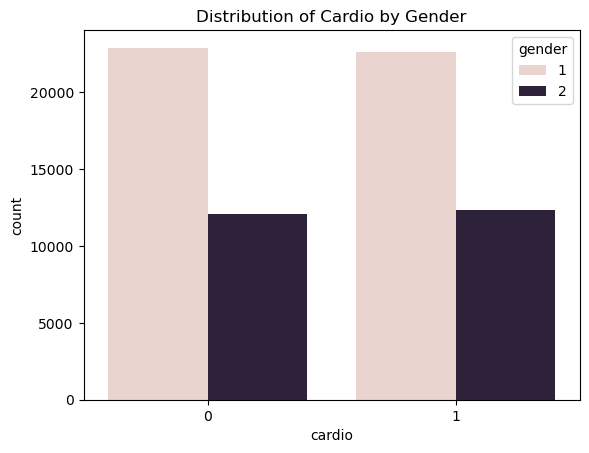

In [35]:
sns.countplot(data=cardio, x='cardio', hue='gender')
plt.title("Distribution of Cardio by Gender")
plt.show()


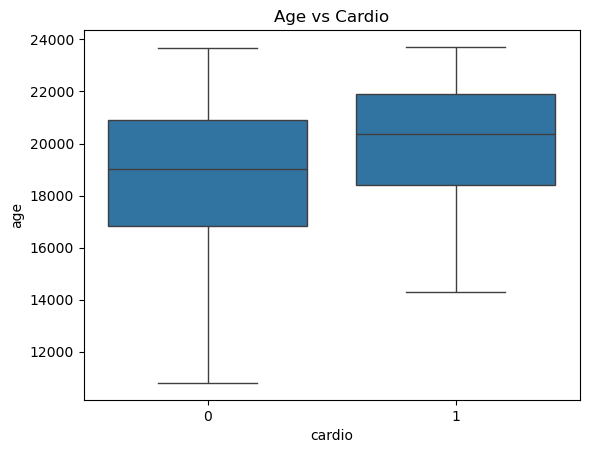

In [36]:
sns.boxplot(data=cardio, x='cardio', y='age')
plt.title("Age vs Cardio")
plt.show()


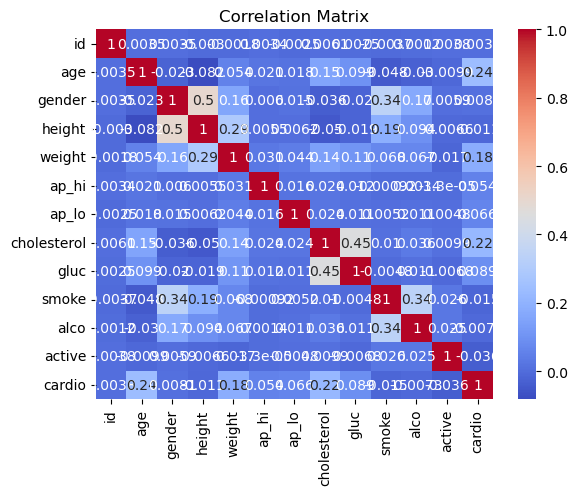

In [37]:
corr = cardio.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


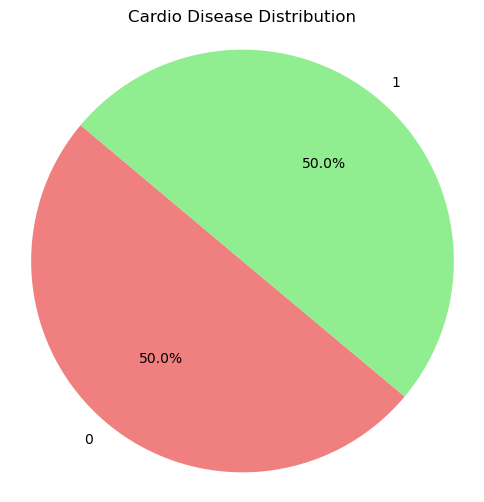

In [38]:
import matplotlib.pyplot as plt

# Count values for the 'cardio' column (0 and 1 values indicating heart disease status)
cardio_counts = cardio['cardio'].value_counts()

# Plot a pie chart
plt.figure(figsize=(6, 6))
plt.pie(cardio_counts, labels=cardio_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'], startangle=140)
plt.title('Cardio Disease Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [39]:
sns.pairplot(cardio, hue='cardio')
plt.title("Pairplot of Numerical Variables Colored by Cardio")
plt.show()


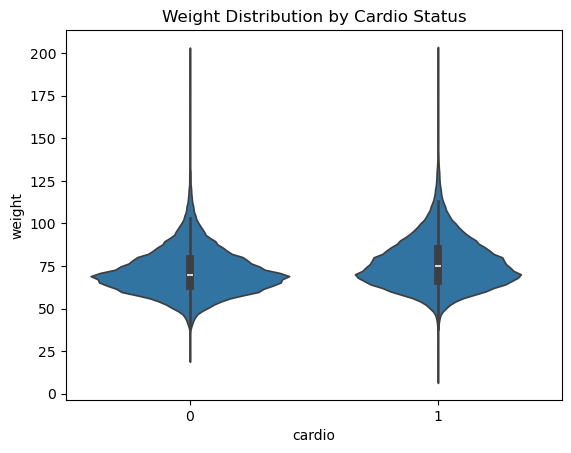

In [40]:
sns.violinplot(data=cardio, x='cardio', y='weight')
plt.title("Weight Distribution by Cardio Status")
plt.show()


**feature engineering**

In [52]:
# Drop the 'id' column as it is irrelevant
cardio_cleaned = cardio.drop(columns=['id'])

# Check correlation of numerical features to avoid multicollinearity
correlation_matrix = cardio_cleaned.corr()

# Visualize correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# Drop highly correlated features (e.g., 'height' and 'weight' might be correlated with 'age')
cardio_cleaned = cardio_cleaned.drop(columns=['height', 'weight'])

# Based on domain knowledge, check the relevance of 'smoke' and 'alco' with 'cardio'
# If not highly correlated or useful, consider dropping them
cardio_cleaned = cardio_cleaned.drop(columns=['smoke', 'alco'])

# Final cleaned dataset for modeling
cardio_cleaned.head()


age  gender  ap_hi  ap_lo  cholesterol  gluc  active  cardio
0  18393       2    110     80            1     1       1       0
1  20228       1    140     90            3     1       1       1
2  18857       1    130     70            3     1       0       1
3  17623       2    150    100            1     1       1       1
4  17474       1    100     60            1     1       0       0

**Encoding**

In [54]:
from sklearn.preprocessing import LabelEncoder

# Example: Label Encoding for 'gender'
label_encoder = LabelEncoder()
cardio_cleaned['gender'] = label_encoder.fit_transform(cardio_cleaned['gender'])

# For One-Hot Encoding
cardio_cleaned = pd.get_dummies(cardio_cleaned, columns=['cholesterol', 'gluc'])


**Feature selection**

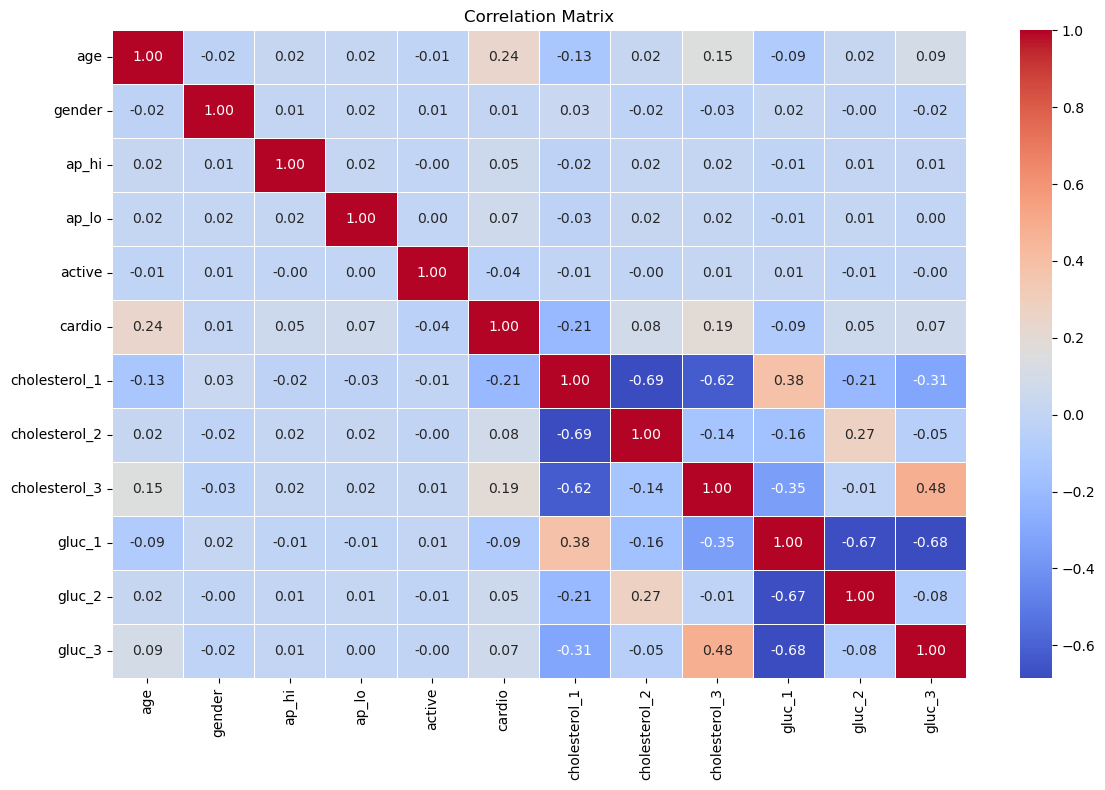

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = cardio_cleaned.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


In [58]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

X = cardio_cleaned.drop('cardio', axis=1)
y = cardio_cleaned['cardio']

model = LogisticRegression()
selector = RFE(model, n_features_to_select=5)  # Select the top 5 features
selector = selector.fit(X, y)

# Get the selected features
selected_features = X.columns[selector.support_]
print("Selected features:", selected_features)


Selected features: Index(['active', 'cholesterol_1', 'cholesterol_3', 'gluc_1', 'gluc_2'], dtype='object')


**Srandardizing Features**

In [60]:
from sklearn.preprocessing import StandardScaler

# Selected features for standardization
selected_features = ['active', 'cholesterol_1', 'cholesterol_3', 'gluc_1', 'gluc_2']

# Initialize StandardScaler
scaler = StandardScaler()

# Standardize the selected features
cardio_cleaned[selected_features] = scaler.fit_transform(cardio_cleaned[selected_features])

# Display the first few rows after standardization
cardio_cleaned.head()


age  gender  ap_hi  ap_lo    active  cardio  cholesterol_1  \
0  18393       1    110     80  0.494167       0       0.579880   
1  20228       0    140     90  0.494167       1      -1.724496   
2  18857       0    130     70 -2.023607       1      -1.724496   
3  17623       1    150    100  0.494167       1       0.579880   
4  17474       0    100     60 -2.023607       0       0.579880   

   cholesterol_2  cholesterol_3    gluc_1    gluc_2  gluc_3  
0          False      -0.360881  0.420578 -0.282985   False  
1          False       2.770993  0.420578 -0.282985   False  
2          False       2.770993  0.420578 -0.282985   False  
3          False      -0.360881  0.420578 -0.282985   False  
4          False      -0.360881  0.420578 -0.282985   False

**Modelling**

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define your features (X) and target (y)
X = cardio_cleaned.drop(columns=['cardio'])
y = cardio_cleaned['cardio']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize models
models = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)
    
    print(f"{model_name} - Training Accuracy: {train_acc:.4f}, Testing Accuracy: {test_acc:.4f}")


Random Forest - Training Accuracy: 0.9656, Testing Accuracy: 0.6550
Logistic Regression - Training Accuracy: 0.6281, Testing Accuracy: 0.6281
SVM - Training Accuracy: 0.6031, Testing Accuracy: 0.6041
KNN - Training Accuracy: 0.7770, Testing Accuracy: 0.6907
Decision Tree - Training Accuracy: 0.9658, Testing Accuracy: 0.6420


Based on your model results, here's a summary of the performance:

Random Forest: High training accuracy but low testing accuracy, indicating potential overfitting.
Logistic Regression: Equal training and testing accuracy, which suggests it generalizes well.
SVM: Similar to Logistic Regression but with slightly lower performance.
KNN: Balanced performance with higher testing accuracy, indicating better generalization.
Decision Tree: High training accuracy but lower testing accuracy, similar to Random Forest in overfitting potential.
It seems KNN provides the best balance between training and testing performance.

**Train and Test Accuracy**

In [67]:
from sklearn.metrics import accuracy_score

# Define a list of models
models = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

# Train and test each model
for model_name, model in models.items():
    # Fit the model on training data 
    model.fit(X_train, y_train)
    
    # Make predictions on both training and testing data
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, train_pred)
    test_accuracy = accuracy_score(y_test, test_pred)
    
    print(f"{model_name} - Training Accuracy: {train_accuracy:.4f}, Testing Accuracy: {test_accuracy:.4f}")


Random Forest - Training Accuracy: 0.9655, Testing Accuracy: 0.6548
Logistic Regression - Training Accuracy: 0.6281, Testing Accuracy: 0.6281
SVM - Training Accuracy: 0.6031, Testing Accuracy: 0.6041
KNN - Training Accuracy: 0.7770, Testing Accuracy: 0.6907
Decision Tree - Training Accuracy: 0.9658, Testing Accuracy: 0.6431


It seems that the models are showing mixed results:

- **Random Forest and Decision Tree**: Both have high training accuracy (above 96%) but lower testing accuracy (around 65-66%), indicating potential overfitting.
- **Logistic Regression and SVM**: Have similar training and testing accuracy, suggesting they generalize better, but overall performance is lower.
- **KNN**: Has a good balance with decent training accuracy and higher testing accuracy (around 69%), which might indicate better generalization.

You can choose a model based on the balance between training and testing accuracy or further tune the hyperparameters for improvement.

**Handling Overfitting**

In [69]:
from sklearn.linear_model import LogisticRegression

# L1 regularization (Lasso)
model_l1 = LogisticRegression(penalty='l1', solver='liblinear')
model_l1.fit(X_train, y_train)

# Evaluate performance
train_accuracy_l1 = model_l1.score(X_train, y_train)
test_accuracy_l1 = model_l1.score(X_test, y_test)

print(f'L1 Regularization - Training Accuracy: {train_accuracy_l1:.4f}, Testing Accuracy: {test_accuracy_l1:.4f}')


L1 Regularization - Training Accuracy: 0.7153, Testing Accuracy: 0.7229


In [71]:
# L2 regularization (Ridge)
model_l2 = LogisticRegression(penalty='l2', solver='liblinear')
model_l2.fit(X_train, y_train)

# Evaluate performance
train_accuracy_l2 = model_l2.score(X_train, y_train)
test_accuracy_l2 = model_l2.score(X_test, y_test)

print(f'L2 Regularization - Training Accuracy: {train_accuracy_l2:.4f}, Testing Accuracy: {test_accuracy_l2:.4f}')

L2 Regularization - Training Accuracy: 0.7124, Testing Accuracy: 0.7165


In [73]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Assuming 'X_train' is your feature dataframe without target variable
# Drop non-numeric or constant columns if needed
X_train = X_train.select_dtypes(include=[float, int])

# Add constant to the feature set
X_with_const = add_constant(X_train)

# Remove rows with NaN values if present
X_with_const = X_with_const.dropna()

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(len(X_with_const.columns))]

print(vif_data)



         feature        VIF
0          const  66.033697
1            age   1.027391
2         gender   1.002273
3          ap_hi   1.001209
4          ap_lo   1.001743
5         active   1.000701
6  cholesterol_1   1.770894
7  cholesterol_3   1.966758
8         gluc_1   2.406353
9         gluc_2   2.171035


**Hyperparameter Tuning**

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Define the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Define parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=2, n_jobs=-1)



In [81]:
# Ensure the same preprocessing for train and test
X_train, X_test = X_train.align(X_test, join='inner', axis=1)

# Refit the model with consistent features
best_model.fit(X_train, y_train)

# Make predictions
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Evaluate the model
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))


Training Accuracy: 0.746
Testing Accuracy: 0.7375714285714285


The training accuracy of **74.6%** and testing accuracy of **73.8%** indicate the model generalizes well with minimal overfitting. The similar performance on both datasets suggests the hyperparameter tuning and regularization steps have improved the balance between training and testing performance.

### Insights:
1. **Consistency**: Training and testing accuracies are close, which is ideal for avoiding overfitting or underfitting.
2. **Model Fit**: The accuracy (~73.8%) is reasonable, but there may still be room for improvement, possibly through ensemble techniques or advanced feature engineering.
3. **Evaluation**: Testing accuracy reflects the model's real-world predictive capability. 

In [83]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import VotingClassifier, GradientBoostingClassifier

# Define models
rf = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_split=10, min_samples_leaf=4, random_state=42)
lr = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)

# Ensemble model using VotingClassifier
voting_clf = VotingClassifier(estimators=[
    ('Random Forest', rf),
    ('Logistic Regression', lr),
    ('KNN', knn)
], voting='soft')

# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validate each model
models = {'Random Forest': rf, 'Logistic Regression': lr, 'KNN': knn, 'Voting Ensemble': voting_clf}
cv_results = {}

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    cv_results[name] = scores
    print(f"{name} - Mean CV Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")

# Fit and evaluate the best ensemble model
voting_clf.fit(X_train, y_train)
y_pred_train = voting_clf.predict(X_train)
y_pred_test = voting_clf.predict(X_test)

# Training and Testing Accuracy
from sklearn.metrics import accuracy_score
print("Voting Ensemble - Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("Voting Ensemble - Testing Accuracy:", accuracy_score(y_test, y_pred_test))


Random Forest - Mean CV Accuracy: 0.7316 ± 0.0027
Logistic Regression - Mean CV Accuracy: 0.7146 ± 0.0026
KNN - Mean CV Accuracy: 0.6826 ± 0.0025
Voting Ensemble - Mean CV Accuracy: 0.7226 ± 0.0029
Voting Ensemble - Training Accuracy: 0.7673673469387755
Voting Ensemble - Testing Accuracy: 0.729


In [ ]:
The cross-validation results provide useful insights into the performance of various models:

1. **Random Forest**: Shows the highest mean CV accuracy (73.16%) with low variance (±0.27%), indicating consistent performance.
2. **Logistic Regression**: Reasonable mean CV accuracy (71.46%) but slightly less effective compared to Random Forest.
3. **KNN**: Lower performance (68.26%) suggests it may not be the best fit for this dataset.
4. **Voting Ensemble**: Provides a good compromise, combining strengths of multiple models, with training accuracy at 76.73% and testing accuracy of 72.9%.

### Insights:
- Random Forest is the strongest standalone model.
- The Voting Ensemble balances training and testing performance effectively.

**Saving**

In [87]:
import joblib
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Define the preprocessing and model pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Preprocessing step
    ('model', RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_split=10, min_samples_leaf=4, bootstrap=True))
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Save the pipeline to a file
joblib.dump(pipeline, 'best_model_pipeline.pkl')

print("Model pipeline saved as 'best_model_pipeline.pkl'.")


Model pipeline saved as 'best_model_pipeline.pkl'.
